# About The Data
We'll be using the Customer Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:

CustomerID
Genre
Age
AnnualIncome(k$)
Spending_Score
Our goal is to group/cluster these customers.

# About K Means
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids. Refer back to the lecture video or slides for more detail on K Means

# Implementation
Because K Means is used more for finding patterns in our data, we'll skip the data exploration portion, but you're welcome to explore this data or your own if working with a different dataset.

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# Example code from pdf
# Load the data into a pandas DataFrame
# Set index_col for 'CustomerID'
# call .head()
customer_df = pd.read_csv('customers.csv', index_col = 'CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# Example code from pdf
# Call .info() to see any missing values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# Example code from pdf
# call .describe()
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Example code from pdf
# If we have any duplicates then we call .drop_duplicates(inplace = True)
customer_df.drop_duplicates(inplace = True)

In [7]:
# Example code from pdf
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

C:\Users\chase\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


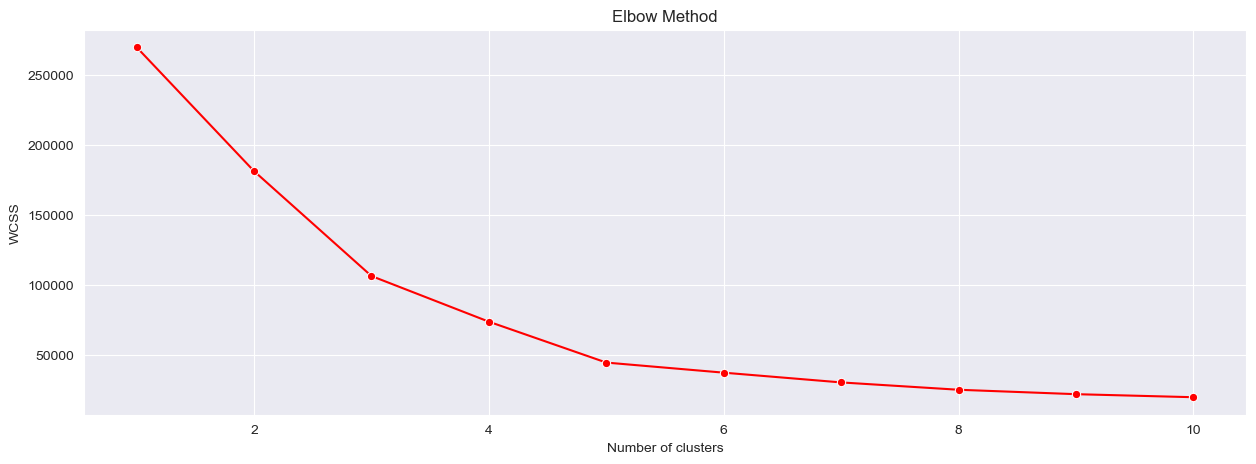

In [8]:
# Example code from pdf
from sklearn.cluster import KMeans
# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # Random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # Inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)
    
# Creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o', color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Example code from pdf
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

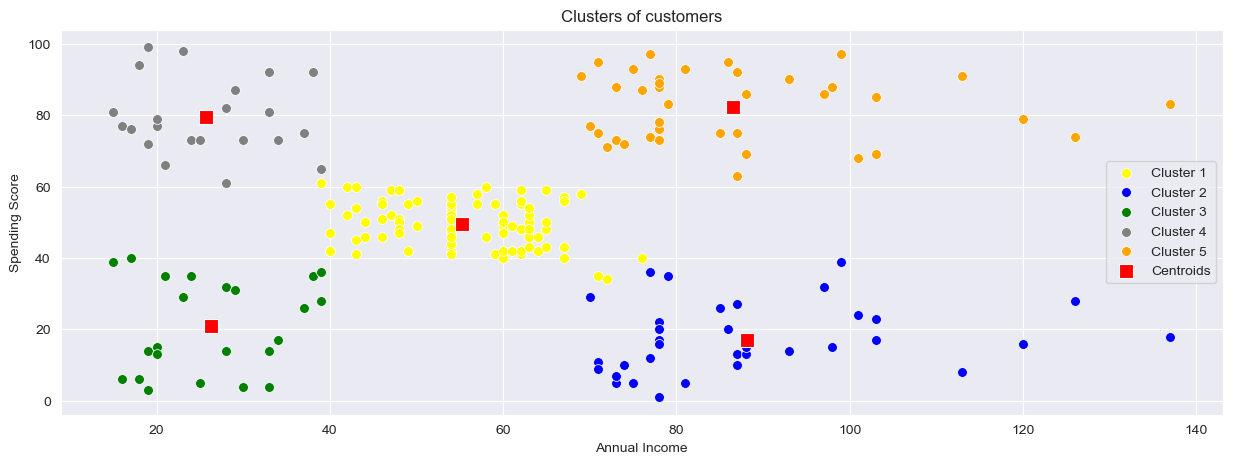

In [10]:
# Example code from pdf
sns.scatterplot(x = X[y_pred == 0, 0], y = X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1', s = 50)
sns.scatterplot(x = X[y_pred == 1, 0], y = X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2', s = 50)
sns.scatterplot(x = X[y_pred == 2, 0], y = X[y_pred == 2, 1], color = 'green', label = 'Cluster 3', s = 50)
sns.scatterplot(x = X[y_pred == 3, 0], y = X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4', s = 50)
sns.scatterplot(x = X[y_pred == 4, 0], y = X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5', s = 50)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids', s = 100, marker = ',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Now I will use my own data that I found from kaggle.com

In [11]:
# Load the data into a pandas DataFrame
# Set index_col for 'Rank'
# call .head(10) to return first 10 rows
vg_sales_df = pd.read_csv('vgsales.csv', index_col = 'Rank')
vg_sales_df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [12]:
# calling .info() to see any missing values
vg_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [13]:
# calling .describe() to get a sense of the data
vg_sales_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
# ensure that we don't have any duplicates
vg_sales_df.drop_duplicates(inplace = True)

In [15]:
# Saving only 'NA_Sales' and 'EU_Sales'
X2 = vg_sales_df.iloc[:, [5, 6]].values

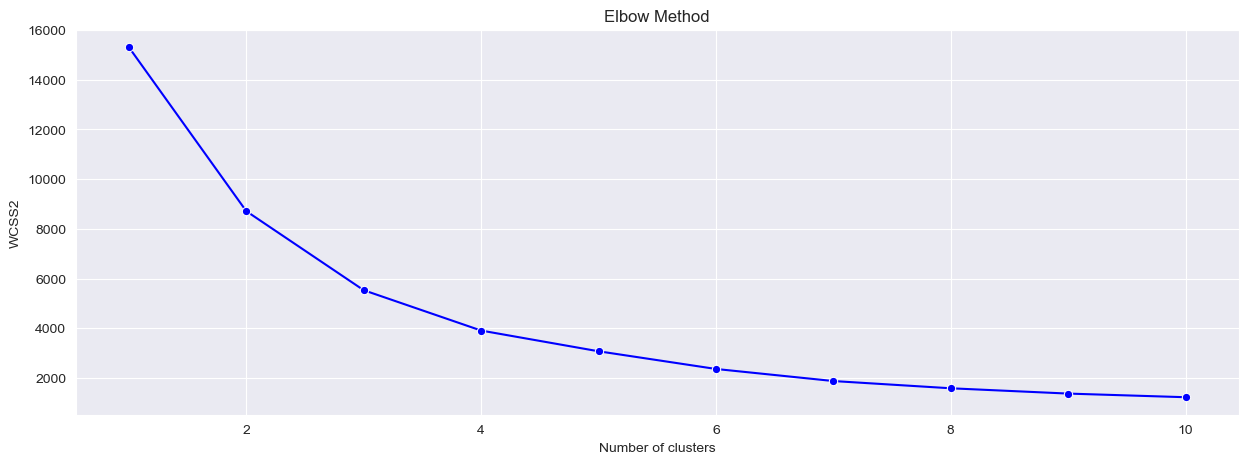

In [16]:
# We already imported KMeans earlier
# where we'll store all of the wcss values for plotting later.
wcss2 = []
for j in range(1, 11):
    # Random_state just to ensure we get the same values in the end.
    kmeans2 = KMeans(n_clusters = j, random_state = 101)
    kmeans2.fit(X2)
    # Inertia method returns wcss for that model.
    wcss2.append(kmeans2.inertia_)
    
# Creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x = range(1, 11), y = wcss2, marker = 'o', color = 'blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS2')
plt.show()

In [17]:
# Create KMean model and run predictions on the X2 vector
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)
y_pred2 = kmeans2.fit_predict(X2)

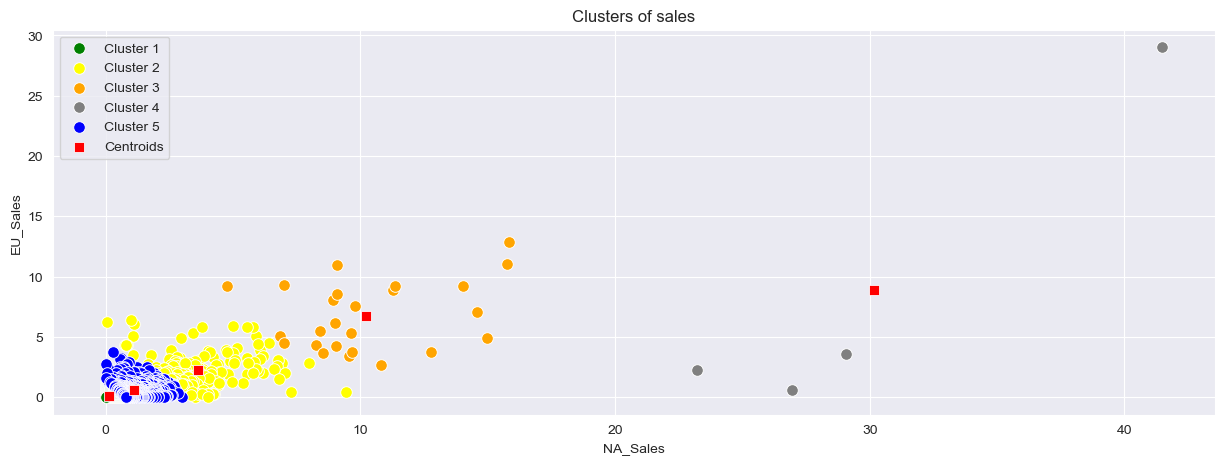

In [18]:
# Create the scatterplot for the clusters
sns.scatterplot(x = X2[y_pred2 == 0, 0], y = X2[y_pred2 == 0, 1], color = 'green', label = 'Cluster 1', s = 70)
sns.scatterplot(x = X2[y_pred2 == 1, 0], y = X2[y_pred2 == 1, 1], color = 'yellow', label = 'Cluster 2', s = 70)
sns.scatterplot(x = X2[y_pred2 == 2, 0], y = X2[y_pred2 == 2, 1], color = 'orange', label = 'Cluster 3', s = 70)
sns.scatterplot(x = X2[y_pred2 == 3, 0], y = X2[y_pred2 == 3, 1], color = 'grey', label = 'Cluster 4', s = 70)
sns.scatterplot(x = X2[y_pred2 == 4, 0], y = X2[y_pred2 == 4, 1], color = 'blue', label = 'Cluster 5', s = 70)
sns.scatterplot(x = kmeans2.cluster_centers_[:, 0], y = kmeans2.cluster_centers_[:, 1], color = 'red', label = 'Centroids', s = 50, marker = ',')
plt.title('Clusters of sales')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.show()

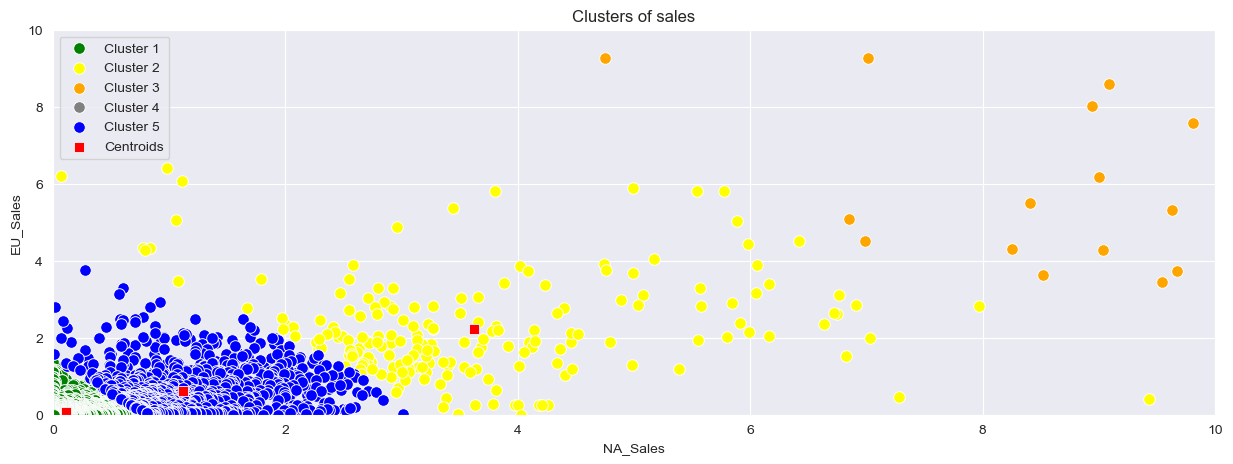

In [19]:
# A closer look
sns.scatterplot(x = X2[y_pred2 == 0, 0], y = X2[y_pred2 == 0, 1], color = 'green', label = 'Cluster 1', s = 70)
sns.scatterplot(x = X2[y_pred2 == 1, 0], y = X2[y_pred2 == 1, 1], color = 'yellow', label = 'Cluster 2', s = 70)
sns.scatterplot(x = X2[y_pred2 == 2, 0], y = X2[y_pred2 == 2, 1], color = 'orange', label = 'Cluster 3', s = 70)
sns.scatterplot(x = X2[y_pred2 == 3, 0], y = X2[y_pred2 == 3, 1], color = 'grey', label = 'Cluster 4', s = 70)
sns.scatterplot(x = X2[y_pred2 == 4, 0], y = X2[y_pred2 == 4, 1], color = 'blue', label = 'Cluster 5', s = 70)
sns.scatterplot(x = kmeans2.cluster_centers_[:, 0], y = kmeans2.cluster_centers_[:, 1], color = 'red', label = 'Centroids', s = 50, marker = ',')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Clusters of sales')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.show()